In [1]:
import sys
import os

package_path = os.path.abspath(os.path.join(os.getcwd(), '..'))

if package_path not in sys.path:
    sys.path.append(package_path)

import torch
from pycontoursnake import Snake
from pycontoursnake.constraints import SpringConstraint
from pycontoursnake.shapes import Ellipse
import cv2
import numpy as np

image = cv2.imread('images/brain.png')
padding = 50

padded_image = np.pad(image, ((4*padding, 4*padding), (padding, padding), (0, 0)), mode='constant', constant_values=255)

height, width = padded_image.shape[:2]
center = (width // 2, height // 2)
#  Set parameters


N = 1000
shape_specs = {
    'center': center,
    'a': padded_image.shape[0] // 2.5,
    'b': padded_image.shape[1] // 3,
    'angle': 0.0,
}
initial_points = Ellipse().generate(N, **shape_specs)
def rest_length_fn(points):   
    distances = torch.linalg.norm(points - torch.tensor(center), axis=1)  
    mean_distance = torch.mean(distances)
    variance = torch.var(distances)
    return torch.pow(distances - mean_distance, 2) / variance

constraints = [
    SpringConstraint(pin_point=center, weight=0.00005, rest_length=rest_length_fn),
]

parameters = {
    'alpha': .05,
    'beta': 0.005,
    'sigma': 2,
    'gamma': 0.5,
    'delta': -0.5,
    'lr': 2,
    'verbose': True,
    'iter_max': 500,
    'constraints': constraints,   
    'gradient_threshold': 0.10,
}



#  Initialize snake
snake = Snake(N, padded_image, points=initial_points, **parameters)
snake.gradient_descent(plot_skip=250)



AttributeError: 'Snake' object has no attribute 'compute_constraint_energy'

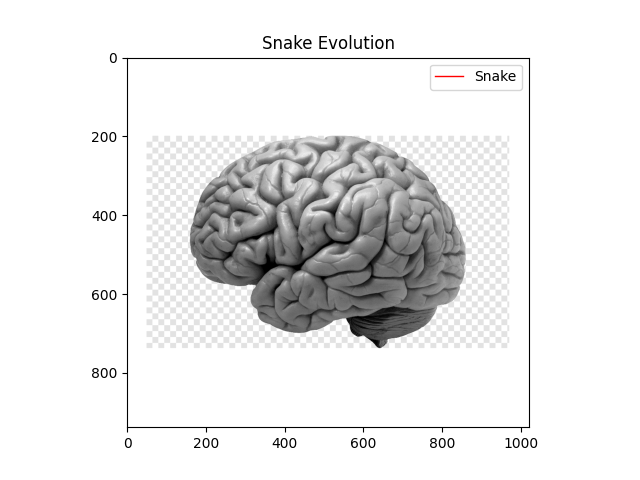

MovieWriter FFMpegWriter unavailable; using Pillow instead.


In [2]:
%matplotlib ipympl
from matplotlib.animation import FuncAnimation


ani = snake.plot_evolution()
# ani.save('brain.gif', writer='FFMpegWriter', fps=600)